In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
df1 = pd.read_csv("brute_TSHARK.csv")
df2 = pd.read_csv("HTTP_TSHARK.csv")
df3 = pd.read_csv("TCP_TSHARK.csv")
df4 = pd.read_csv("UDP_TSJARK.csv",error_bad_lines=False)
df5 = pd.read_csv("NORAML_TSHARK.csv")

C:\Users\Wellcome\AppData\Local\Temp\ipykernel_13360\4087351952.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df4 = pd.read_csv("UDP_TSJARK.csv",error_bad_lines=False)
b'Skipping line 4196: expected 31 fields, saw 39\nSkipping line 4197: expected 31 fields, saw 39\nSkipping line 4198: expected 31 fields, saw 39\nSkipping line 4199: expected 31 fields, saw 39\nSkipping line 4200: expected 31 fields, saw 39\nSkipping line 4201: expected 31 fields, saw 39\nSkipping line 5747: expected 31 fields, saw 39\nSkipping line 5748: expected 31 fields, saw 39\nSkipping line 5749: expected 31 fields, saw 39\nSkipping line 5750: expected 31 fields, saw 39\nSkipping line 5751: expected 31 fields, saw 39\nSkipping line 5752: expected 31 fields, saw 39\nSkipping line 28460: expected 31 fields, saw 39\n'
b'Skipping line 53698: expected 31 fields, saw 39\n'
b'Skipping line 79363: expected 31 fields, saw 39

In [3]:
df1 = df1.fillna(0)
df2 = df2.fillna(0)
df3 = df3.fillna(0)
df4 = df4.fillna(0)
df5 = df5.fillna(0)

In [4]:
df1 = df1.drop(['ip.src','ip.dst','ipv6.src','ipv6.dst','eth.src','eth.dst','ip.id','tcp.flags','ipv6.dst','ip.ttl','icmp.length','http.request.method','http.response.code','http.content_length'],axis = 1)
df1 = pd.get_dummies(df1)
df1["attack_type"] = "brute_force"
df1

,ip.proto,ip.hdr_len,ip.len,ip.flags.df,tcp.stream,tcp.time_delta,tcp.time_relative,tcp.analysis.initial_rtt,tcp.window_size_value,tcp.hdr_len,tcp.len,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,udp.stream,udp.length,ip.ttl.1,attack_type
0,17.0,20.0,426.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5353.0,5353.0,0.0,406.0,255.0,brute_force
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,brute_force
2,6.0,20.0,64.0,1.0,0.0,0.000000,0.000000,0.000000,65535.0,44.0,0.0,53709.0,7.0,0.0,0.0,0.0,0.0,64.0,brute_force
3,6.0,20.0,40.0,1.0,0.0,0.038051,0.038051,0.038051,0.0,20.0,0.0,7.0,53709.0,0.0,0.0,0.0,0.0,64.0,brute_force
4,6.0,20.0,64.0,1.0,1.0,0.000000,0.000000,0.000000,65535.0,44.0,0.0,53712.0,7.0,0.0,0.0,0.0,0.0,64.0,brute_force
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17.0,20.0,1134.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,32920.0,58702.0,1.0,1114.0,64.0,brute_force
17996,17.0,20.0,43.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,32920.0,58702.0,1.0,23.0,64.0,brute_force
17997,17.0,20.0,55.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,32920.0,58702.0,1.0,35.0,64.0,brute_force
17998,17.0,20.0,1480.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,32920.0,58702.0,1.0,1460.0,64.0,brute_force


In [5]:
df2 = df2.drop(['ip.src','ip.dst','ipv6.src','ipv6.dst','eth.src','eth.dst','ip.id','tcp.flags','ipv6.dst','ip.ttl','icmp.length','http.request.method','http.response.code','http.content_length'],axis = 1)
df2 = pd.get_dummies(df2)
df2["attack_type"] = "HTTP_flood"
df2

,ip.proto,ip.hdr_len,ip.len,ip.flags.df,tcp.stream,tcp.time_delta,tcp.time_relative,tcp.analysis.initial_rtt,tcp.window_size_value,tcp.hdr_len,tcp.len,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,udp.stream,udp.length,ip.ttl.1,attack_type
0,6.0,20.0,64.0,1.0,0.0,0.0,0.0,0.0,65535.0,44.0,0.0,51468.0,80.0,0.0,0.0,0.0,0.0,64.0,HTTP_flood
1,6.0,20.0,64.0,1.0,1.0,0.0,0.0,0.0,65535.0,44.0,0.0,51469.0,80.0,0.0,0.0,0.0,0.0,64.0,HTTP_flood
2,6.0,20.0,64.0,1.0,2.0,0.0,0.0,0.0,65535.0,44.0,0.0,51470.0,80.0,0.0,0.0,0.0,0.0,64.0,HTTP_flood
3,6.0,20.0,64.0,1.0,3.0,0.0,0.0,0.0,65535.0,44.0,0.0,51471.0,80.0,0.0,0.0,0.0,0.0,64.0,HTTP_flood
4,6.0,20.0,64.0,1.0,4.0,0.0,0.0,0.0,65535.0,44.0,0.0,51472.0,80.0,0.0,0.0,0.0,0.0,64.0,HTTP_flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230044,6.0,20.0,64.0,1.0,114977.0,0.0,0.0,0.0,65535.0,44.0,0.0,51870.0,80.0,0.0,0.0,0.0,0.0,64.0,HTTP_flood
230045,6.0,20.0,64.0,1.0,114978.0,0.0,0.0,0.0,65535.0,44.0,0.0,51871.0,80.0,0.0,0.0,0.0,0.0,64.0,HTTP_flood
230046,6.0,20.0,64.0,1.0,114979.0,0.0,0.0,0.0,65535.0,44.0,0.0,51872.0,80.0,0.0,0.0,0.0,0.0,64.0,HTTP_flood
230047,6.0,20.0,64.0,1.0,114980.0,0.0,0.0,0.0,65535.0,44.0,0.0,51873.0,80.0,0.0,0.0,0.0,0.0,64.0,HTTP_flood


In [6]:
df3 = df3.drop(['ip.src','ip.dst','ipv6.src','ipv6.dst','eth.src','eth.dst','ip.id','tcp.flags','ipv6.dst','ip.ttl','icmp.length','http.request.method','http.response.code','http.content_length'],axis = 1)
df3 = pd.get_dummies(df3)
df3["attack_type"] = "TCP_flood"
df3

,ip.proto,ip.hdr_len,ip.len,ip.flags.df,tcp.stream,tcp.time_delta,tcp.time_relative,tcp.analysis.initial_rtt,tcp.window_size_value,tcp.hdr_len,tcp.len,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,udp.stream,udp.length,ip.ttl.1,attack_type
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TCP_flood
1,6.0,20.0,64.0,1.0,0.0,0.000000,0.000000,0.000000,65535.0,44.0,0.0,61870.0,80.0,0.0,0.0,0.0,0.0,64.0,TCP_flood
2,6.0,20.0,64.0,1.0,1.0,0.000000,0.000000,0.000000,65535.0,44.0,0.0,61871.0,80.0,0.0,0.0,0.0,0.0,64.0,TCP_flood
3,6.0,20.0,64.0,1.0,2.0,0.000000,0.000000,0.000000,65535.0,44.0,0.0,61872.0,80.0,0.0,0.0,0.0,0.0,64.0,TCP_flood
4,6.0,20.0,40.0,1.0,0.0,0.008499,0.008499,0.008499,0.0,20.0,0.0,80.0,61870.0,0.0,0.0,0.0,0.0,64.0,TCP_flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,6.0,20.0,64.0,1.0,1000.0,0.000000,0.000000,0.000000,65535.0,44.0,0.0,62870.0,80.0,0.0,0.0,0.0,0.0,64.0,TCP_flood
2003,6.0,20.0,40.0,1.0,999.0,0.003082,0.003082,0.003082,0.0,20.0,0.0,80.0,62869.0,0.0,0.0,0.0,0.0,64.0,TCP_flood
2004,6.0,20.0,40.0,1.0,1000.0,0.002345,0.002345,0.002345,0.0,20.0,0.0,80.0,62870.0,0.0,0.0,0.0,0.0,64.0,TCP_flood
2005,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TCP_flood


In [7]:
df4 = df4.drop(['ip.src','ip.dst','ipv6.src','ipv6.dst','eth.src','eth.dst','ip.id','tcp.flags','ipv6.dst','ip.ttl','icmp.length','http.request.method','http.response.code','http.content_length'],axis = 1)
df4 = pd.get_dummies(df4)
df4["attack_type"] = "UDP_flood"
df4

,ip.proto,ip.hdr_len,ip.len,ip.flags.df,tcp.stream,tcp.time_delta,tcp.time_relative,tcp.analysis.initial_rtt,tcp.window_size_value,tcp.hdr_len,tcp.len,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,udp.stream,udp.length,ip.ttl.1,attack_type
0,17.0,20.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61033.0,80.0,0.0,40.0,63.0,UDP_flood
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP_flood
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP_flood
3,17.0,20.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65101.0,80.0,1.0,40.0,63.0,UDP_flood
4,17.0,20.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65101.0,80.0,1.0,40.0,63.0,UDP_flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800756,17.0,20.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54548.0,80.0,88.0,40.0,63.0,UDP_flood
800757,17.0,20.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54548.0,80.0,88.0,40.0,63.0,UDP_flood
800758,17.0,20.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54548.0,80.0,88.0,40.0,63.0,UDP_flood
800759,17.0,20.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54548.0,80.0,88.0,40.0,63.0,UDP_flood


In [8]:
df5 = df5.drop(['ip.src','ip.dst','ipv6.src','ipv6.dst','eth.src','eth.dst','ip.id','tcp.flags','ipv6.dst','ip.ttl','icmp.length','http.request.method','http.response.code','http.content_length'],axis = 1)
df5 = pd.get_dummies(df5)
df5["attack_type"] = "Normal_Traffic"
df5

,ip.proto,ip.hdr_len,ip.len,ip.flags.df,tcp.stream,tcp.time_delta,tcp.time_relative,tcp.analysis.initial_rtt,tcp.window_size_value,tcp.hdr_len,tcp.len,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,udp.stream,udp.length,ip.ttl.1,attack_type
0,17.0,20.0,1278.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,443.0,65085.0,0.0,1258.0,123.0,Normal_Traffic
1,17.0,20.0,1278.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,443.0,65085.0,0.0,1258.0,123.0,Normal_Traffic
2,17.0,20.0,1278.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,443.0,65085.0,0.0,1258.0,123.0,Normal_Traffic
3,17.0,20.0,1278.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,443.0,65085.0,0.0,1258.0,123.0,Normal_Traffic
4,17.0,20.0,1278.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,443.0,65085.0,0.0,1258.0,123.0,Normal_Traffic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21760,6.0,20.0,40.0,1.0,272.0,0.000335,32.244509,0.176384,517.0,20.0,0.0,50860.0,443.0,0.0,0.0,0.0,0.0,128.0,Normal_Traffic
21761,6.0,20.0,40.0,1.0,266.0,30.734646,39.198204,0.013704,501.0,20.0,0.0,443.0,50854.0,0.0,0.0,0.0,0.0,62.0,Normal_Traffic
21762,6.0,20.0,40.0,1.0,33.0,30.467920,165.647915,0.000000,7171.0,20.0,0.0,443.0,49915.0,0.0,0.0,0.0,0.0,62.0,Normal_Traffic
21763,6.0,20.0,40.0,1.0,266.0,0.000049,39.198253,0.013704,517.0,20.0,0.0,50854.0,443.0,0.0,0.0,0.0,0.0,128.0,Normal_Traffic


In [9]:
frames = [df1,df2,df3,df4,df5]

### concatenating data
result = pd.concat(frames)

##display
result

,ip.proto,ip.hdr_len,ip.len,ip.flags.df,tcp.stream,tcp.time_delta,tcp.time_relative,tcp.analysis.initial_rtt,tcp.window_size_value,tcp.hdr_len,tcp.len,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,udp.stream,udp.length,ip.ttl.1,attack_type
0,17.0,20.0,426.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5353.0,5353.0,0.0,406.0,255.0,brute_force
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,brute_force
2,6.0,20.0,64.0,1.0,0.0,0.000000,0.000000,0.000000,65535.0,44.0,0.0,53709.0,7.0,0.0,0.0,0.0,0.0,64.0,brute_force
3,6.0,20.0,40.0,1.0,0.0,0.038051,0.038051,0.038051,0.0,20.0,0.0,7.0,53709.0,0.0,0.0,0.0,0.0,64.0,brute_force
4,6.0,20.0,64.0,1.0,1.0,0.000000,0.000000,0.000000,65535.0,44.0,0.0,53712.0,7.0,0.0,0.0,0.0,0.0,64.0,brute_force
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21760,6.0,20.0,40.0,1.0,272.0,0.000335,32.244509,0.176384,517.0,20.0,0.0,50860.0,443.0,0.0,0.0,0.0,0.0,128.0,Normal_Traffic
21761,6.0,20.0,40.0,1.0,266.0,30.734646,39.198204,0.013704,501.0,20.0,0.0,443.0,50854.0,0.0,0.0,0.0,0.0,62.0,Normal_Traffic
21762,6.0,20.0,40.0,1.0,33.0,30.467920,165.647915,0.000000,7171.0,20.0,0.0,443.0,49915.0,0.0,0.0,0.0,0.0,62.0,Normal_Traffic
21763,6.0,20.0,40.0,1.0,266.0,0.000049,39.198253,0.013704,517.0,20.0,0.0,50854.0,443.0,0.0,0.0,0.0,0.0,128.0,Normal_Traffic


<AxesSubplot:>

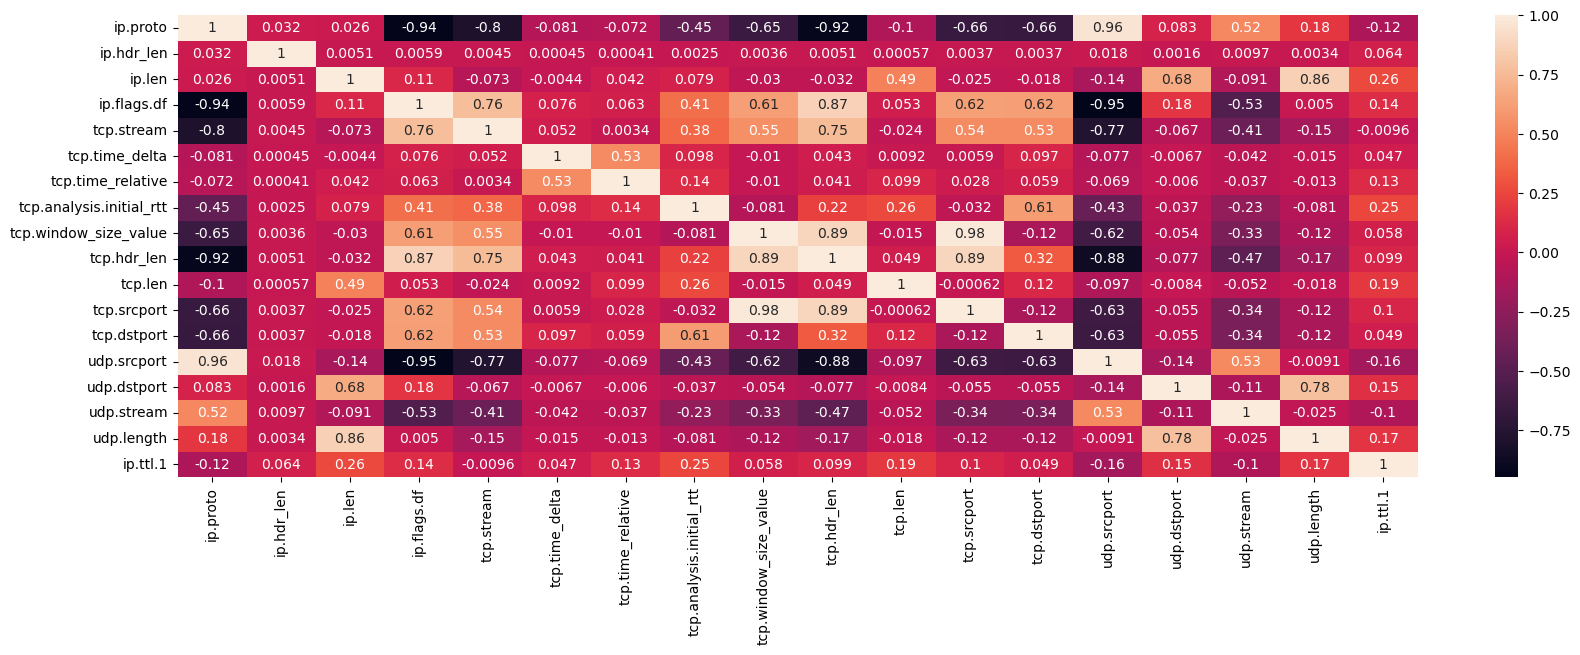

In [10]:
plt.figure(figsize=(20, 6)) 
corr_matrix = result.corr()
sns.heatmap(corr_matrix,annot=True)

In [11]:
#target = corr_matrix['attack_type'].iloc[:-1].sort_values().plot(kind = 'bar')
#print(target)
#corr_matrix['attack_type'].sort_values()
y = result['attack_type']
y

0           brute_force
1           brute_force
2           brute_force
3           brute_force
4           brute_force
              ...      
21760    Normal_Traffic
21761    Normal_Traffic
21762    Normal_Traffic
21763    Normal_Traffic
21764    Normal_Traffic
Name: attack_type, Length: 1072582, dtype: object

In [12]:
### dropping type because it will be our label that we want to predict 
X = result.drop("attack_type",axis=1)

### display
X

,ip.proto,ip.hdr_len,ip.len,ip.flags.df,tcp.stream,tcp.time_delta,tcp.time_relative,tcp.analysis.initial_rtt,tcp.window_size_value,tcp.hdr_len,tcp.len,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,udp.stream,udp.length,ip.ttl.1
0,17.0,20.0,426.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5353.0,5353.0,0.0,406.0,255.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.0,20.0,64.0,1.0,0.0,0.000000,0.000000,0.000000,65535.0,44.0,0.0,53709.0,7.0,0.0,0.0,0.0,0.0,64.0
3,6.0,20.0,40.0,1.0,0.0,0.038051,0.038051,0.038051,0.0,20.0,0.0,7.0,53709.0,0.0,0.0,0.0,0.0,64.0
4,6.0,20.0,64.0,1.0,1.0,0.000000,0.000000,0.000000,65535.0,44.0,0.0,53712.0,7.0,0.0,0.0,0.0,0.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21760,6.0,20.0,40.0,1.0,272.0,0.000335,32.244509,0.176384,517.0,20.0,0.0,50860.0,443.0,0.0,0.0,0.0,0.0,128.0
21761,6.0,20.0,40.0,1.0,266.0,30.734646,39.198204,0.013704,501.0,20.0,0.0,443.0,50854.0,0.0,0.0,0.0,0.0,62.0
21762,6.0,20.0,40.0,1.0,33.0,30.467920,165.647915,0.000000,7171.0,20.0,0.0,443.0,49915.0,0.0,0.0,0.0,0.0,62.0
21763,6.0,20.0,40.0,1.0,266.0,0.000049,39.198253,0.013704,517.0,20.0,0.0,50854.0,443.0,0.0,0.0,0.0,0.0,128.0


In [13]:
#### implementing Random Forest
## using Train TESt split
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
from sklearn.ensemble import RandomForestClassifier
import time

In [16]:
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=60,max_features="auto",random_state=101) 
rfc.fit(X_train,y_train)
end_time = time.time()

In [17]:
train_time = end_time - start_time
print("Training time :",train_time,"seconds") 

Training time : 47.02501392364502 seconds


In [18]:
start_time = time.time()
preds = rfc.predict(X_test)
end_time = time.time()


In [19]:
test_time = end_time - start_time
print("Test time :",test_time,"seconds")

Test time : 3.94705867767334 seconds


In [20]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score

In [42]:
print(classification_report(y_test,preds))
model_accuracy = rfc.score(y_test,preds)
model_accuracy

                precision    recall  f1-score   support

    HTTP_flood       1.00      1.00      1.00     69153
Normal_Traffic       1.00      1.00      1.00      6588
     TCP_flood       1.00      1.00      1.00       584
     UDP_flood       1.00      1.00      1.00    240047
   brute_force       1.00      1.00      1.00      5403

      accuracy                           1.00    321775
     macro avg       1.00      1.00      1.00    321775
  weighted avg       1.00      1.00      1.00    321775



C:\Users\Wellcome\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: 'UDP_flood'

<AxesSubplot:>

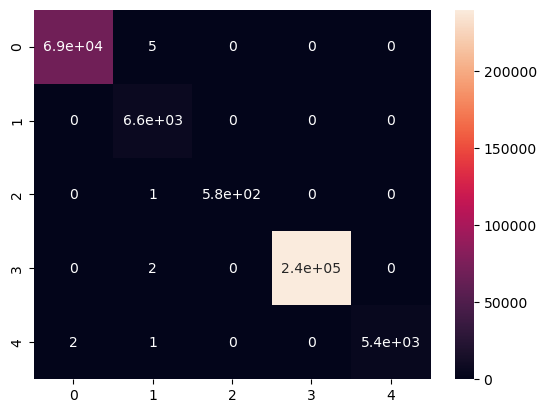

In [22]:
conf = confusion_matrix(y_test,preds)
sns.heatmap(conf,annot=True)

In [27]:
df6 = pd.read_csv('Corvit_Implemented_tcp_flood.csv')

C:\Users\Wellcome\AppData\Local\Temp\ipykernel_13360\1376015311.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df6 = pd.read_csv('Corvit_Implemented_tcp_flood.csv')


In [28]:
df6 = df6.fillna(0)

In [29]:
df6 = df6.drop(['frame.len','ip.src','ip.dst','ipv6.src','ipv6.dst','eth.src','eth.dst','ip.id','tcp.flags','ipv6.dst','ip.ttl','icmp.length','http.request.method','http.response.code','http.content_length'],axis = 1)
df6 = pd.get_dummies(df6)
df6["attack_type"] = "TCP_flood"
df6

,ip.proto,ip.hdr_len,ip.len,ip.flags.df,tcp.stream,tcp.time_delta,tcp.time_relative,tcp.analysis.initial_rtt,tcp.window_size_value,tcp.hdr_len,tcp.len,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,udp.stream,udp.length,ip.ttl.1,attack_type
0,6.0,20.0,52.0,1.0,0.0,0.000000,0.000000,0.000000,64240.0,32.0,0.0,62256.0,80.0,0.0,0.0,0.0,0.0,128.0,TCP_flood
1,6.0,20.0,52.0,1.0,0.0,0.000000,0.000000,0.000000,64240.0,32.0,0.0,62256.0,80.0,0.0,0.0,0.0,0.0,128.0,TCP_flood
2,6.0,20.0,40.0,0.0,0.0,0.000115,0.000115,0.000115,14600.0,20.0,0.0,80.0,62256.0,0.0,0.0,0.0,0.0,255.0,TCP_flood
3,6.0,20.0,40.0,0.0,0.0,0.000000,0.000115,0.000000,14600.0,20.0,0.0,80.0,62256.0,0.0,0.0,0.0,0.0,255.0,TCP_flood
4,6.0,20.0,52.0,1.0,1.0,0.000000,0.000000,0.000000,64240.0,32.0,0.0,61321.0,80.0,0.0,0.0,0.0,0.0,128.0,TCP_flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048330,6.0,20.0,52.0,1.0,55812.0,0.000000,0.000000,0.000000,64240.0,32.0,0.0,51157.0,80.0,0.0,0.0,0.0,0.0,128.0,TCP_flood
1048331,6.0,20.0,52.0,1.0,55812.0,0.000000,0.000000,0.000000,64240.0,32.0,0.0,51157.0,80.0,0.0,0.0,0.0,0.0,128.0,TCP_flood
1048332,6.0,20.0,40.0,0.0,55432.0,0.000206,0.499899,0.000200,14600.0,20.0,0.0,80.0,50777.0,0.0,0.0,0.0,0.0,255.0,TCP_flood
1048333,6.0,20.0,40.0,0.0,55432.0,0.000020,0.499919,0.000000,14600.0,20.0,0.0,80.0,50777.0,0.0,0.0,0.0,0.0,255.0,TCP_flood


In [30]:
y1 = result['attack_type']


In [34]:
y1

0           brute_force
1           brute_force
2           brute_force
3           brute_force
4           brute_force
              ...      
21760    Normal_Traffic
21761    Normal_Traffic
21762    Normal_Traffic
21763    Normal_Traffic
21764    Normal_Traffic
Name: attack_type, Length: 1072582, dtype: object

In [31]:
X1 = result.drop("attack_type",axis=1)

### display
X1

,ip.proto,ip.hdr_len,ip.len,ip.flags.df,tcp.stream,tcp.time_delta,tcp.time_relative,tcp.analysis.initial_rtt,tcp.window_size_value,tcp.hdr_len,tcp.len,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,udp.stream,udp.length,ip.ttl.1
0,17.0,20.0,426.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5353.0,5353.0,0.0,406.0,255.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.0,20.0,64.0,1.0,0.0,0.000000,0.000000,0.000000,65535.0,44.0,0.0,53709.0,7.0,0.0,0.0,0.0,0.0,64.0
3,6.0,20.0,40.0,1.0,0.0,0.038051,0.038051,0.038051,0.0,20.0,0.0,7.0,53709.0,0.0,0.0,0.0,0.0,64.0
4,6.0,20.0,64.0,1.0,1.0,0.000000,0.000000,0.000000,65535.0,44.0,0.0,53712.0,7.0,0.0,0.0,0.0,0.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21760,6.0,20.0,40.0,1.0,272.0,0.000335,32.244509,0.176384,517.0,20.0,0.0,50860.0,443.0,0.0,0.0,0.0,0.0,128.0
21761,6.0,20.0,40.0,1.0,266.0,30.734646,39.198204,0.013704,501.0,20.0,0.0,443.0,50854.0,0.0,0.0,0.0,0.0,62.0
21762,6.0,20.0,40.0,1.0,33.0,30.467920,165.647915,0.000000,7171.0,20.0,0.0,443.0,49915.0,0.0,0.0,0.0,0.0,62.0
21763,6.0,20.0,40.0,1.0,266.0,0.000049,39.198253,0.013704,517.0,20.0,0.0,50854.0,443.0,0.0,0.0,0.0,0.0,128.0


In [41]:
X_test

,ip.proto,ip.hdr_len,ip.len,ip.flags.df,tcp.stream,tcp.time_delta,tcp.time_relative,tcp.analysis.initial_rtt,tcp.window_size_value,tcp.hdr_len,tcp.len,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,udp.stream,udp.length,ip.ttl.1
773593,17.0,20.0,60.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,57069.0,80.0,111.0,40.0,63.0
87758,17.0,20.0,60.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,65513.0,80.0,21.0,40.0,63.0
535953,17.0,20.0,60.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,49558.0,80.0,99.0,40.0,63.0
501341,17.0,20.0,60.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,51593.0,80.0,87.0,40.0,63.0
1617,6.0,20.0,64.0,1.0,814.0,0.000000,0.000000,0.000000,65535.0,44.0,0.0,52282.0,80.0,0.0,0.0,0.0,0.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216868,6.0,20.0,40.0,1.0,108329.0,0.086490,0.086490,0.086490,0.0,20.0,0.0,80.0,61595.0,0.0,0.0,0.0,0.0,64.0
530590,17.0,20.0,60.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,56570.0,80.0,93.0,40.0,63.0
150232,17.0,20.0,60.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,49302.0,80.0,19.0,40.0,63.0
219176,17.0,20.0,60.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,53315.0,80.0,39.0,40.0,63.0


In [35]:
result = rfc.predict(X1)
result

array(['brute_force', 'Normal_Traffic', 'brute_force', ...,
       'Normal_Traffic', 'Normal_Traffic', 'Normal_Traffic'], dtype=object)

In [43]:
model_accuracy = rfc.score(result,y1)
model_accuracy

C:\Users\Wellcome\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: 'brute_force'

In [46]:
pred = rfc.predict(X_test)
pred

array(['UDP_flood', 'UDP_flood', 'UDP_flood', ..., 'UDP_flood',
       'UDP_flood', 'HTTP_flood'], dtype=object)